In [1]:
import random
random.seed(123)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
import scipy.stats as stats

In [2]:
sns.set_style("whitegrid")
#sns.set_palette('Set1')

In [3]:
df = pd.read_csv("../resources/data/discords/Earthquake_WithoutCNN/FromJsontoRawearthquake21Sep_Pre _CNN_Accumulate10secondsPredZERO_korea.csv",header=None,names=['col0','col1','col2'],sep=",")

In [4]:
df.drop('col0', axis=1, inplace=True)
df.drop('col1', axis=1, inplace=True)

In [5]:
#Show for viewing
df.head(29420)

,col2
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [6]:
#Kich thuoc du lieu
print df.shape

(25585, 1)


In [49]:
df_overWorld = pd.read_csv("../resources/data/discords/Earthquake/FromJsontoRawearthquake21Sep_Pre _CNN_Accumulate10secondsPredBOTH_overWorld.csv",header=None,names=['col0','col1','col2'],sep=",")
df_KoreaBoth = pd.read_csv("../resources/data/discords/Earthquake/FromJsontoRawearthquake21Sep_Pre _CNN_Accumulate10secondsPredBOTH_korea.csv",header=None,names=['col0','col1','col2'],sep=",")
df_KoreaZero = pd.read_csv("../resources/data/discords/Earthquake/FromJsontoRawearthquake21Sep_Pre _CNN_Accumulate10secondsPredZERO_korea.csv",header=None,names=['col0','col1','col2'],sep=",")
df_KoreaOne = pd.read_csv("../resources/data/discords/Earthquake/FromJsontoRawearthquake21Sep_Pre _CNN_Accumulate10secondsPredONE_korea.csv",header=None,names=['col0','col1','col2'],sep=",")

In [50]:
df_overWorld.drop('col0', axis=1, inplace=True)
df_overWorld.drop('col1', axis=1, inplace=True)

df_KoreaBoth.drop('col0', axis=1, inplace=True)
df_KoreaBoth.drop('col1', axis=1, inplace=True)

df_KoreaZero.drop('col0', axis=1, inplace=True)
df_KoreaZero.drop('col1', axis=1, inplace=True)

df_KoreaOne.drop('col0', axis=1, inplace=True)
df_KoreaOne.drop('col1', axis=1, inplace=True)


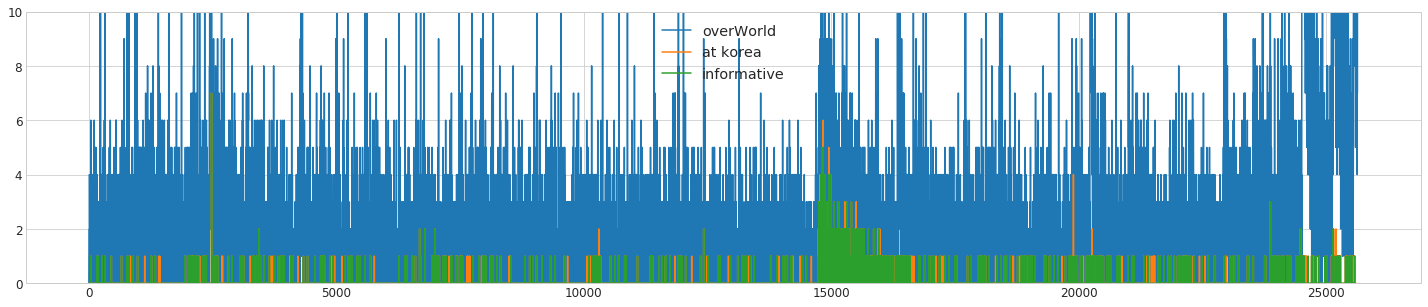

In [63]:
fig_Compare = plt.figure(figsize=(25,5))

#plt.subplot(411)
plt.ylim([0, 10])
plt.plot(df_overWorld['col2'], label= 'overWorld')
#plt.subplot(412)
plt.plot(df_KoreaBoth['col2'], label= 'at korea')
#plt.subplot(413)
plt.plot(df_KoreaZero['col2'], label= 'informative')
#plt.subplot(414)
#plt.plot(df_KoreaOne['col2'])
plt.legend()
plt.show()
pdf_compare=PdfPages("Preprocessing stage")
pdf_compare.savefig(fig_Compare)
pdf_compare.close()

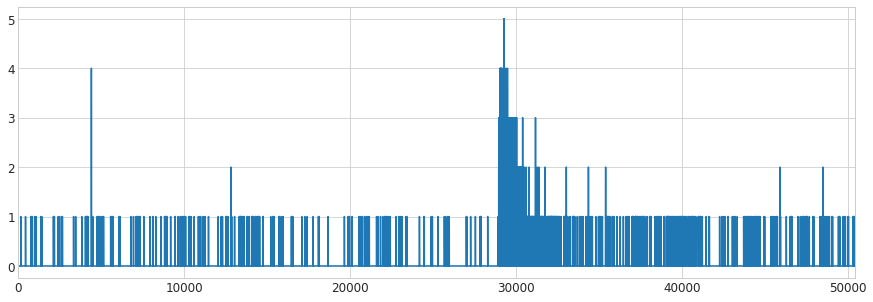

In [64]:
df['col2'].plot()
plt.show()

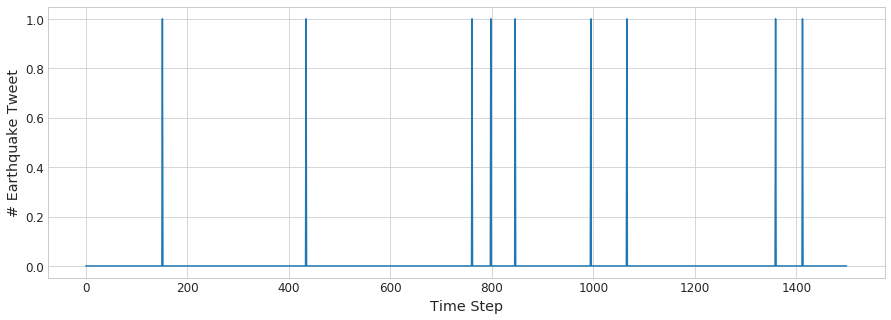

In [50]:
#tin hieu o trang thai khong co dong dat Without earthquake event situation
fig = plt.figure(figsize=(15,5))
df0 = df['col2'][0:1500]
plt.plot(df0)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("No earthquake")
pp.savefig(fig)
pp.close()

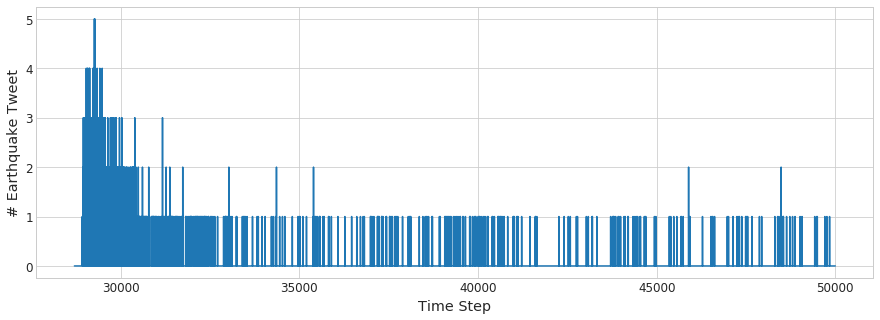

In [51]:
#isolate earthquake event [anomaly1]
fig1 = plt.figure(figsize=(15,5))
df1= df['col2'][28700:50000]
plt.plot(df1)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig1)
pp.close()

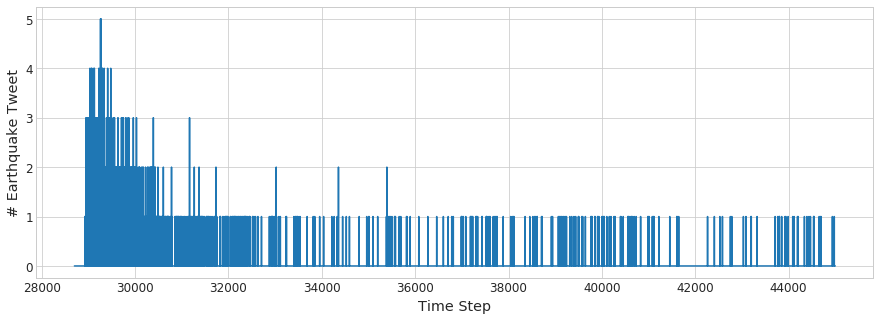

In [52]:
#isolate anomaly 2
fig2 = plt.figure(figsize=(15,5))
df2= df['col2'][28700:45000]
plt.plot(df2)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig2)
pp.close()

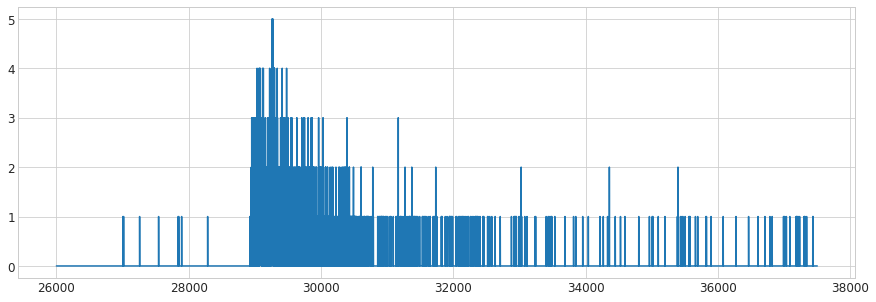

In [53]:
#isolate end sequence
df3= df['col2'][26000:37500]
plt.plot(df3)
plt.show()

In [54]:
df['anomaly'] = 0
df.head(28750)

,col2,anomaly
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Size of test: 50442
Size of validation1: 11500
Size of validation2: 50442
Size of train: 38942
Total: 151326
Ratio of test: 0.333333
Ratio of validation1: 0.075995
Ratio of validation2: 0.333333
Ratio of train: 0.257338


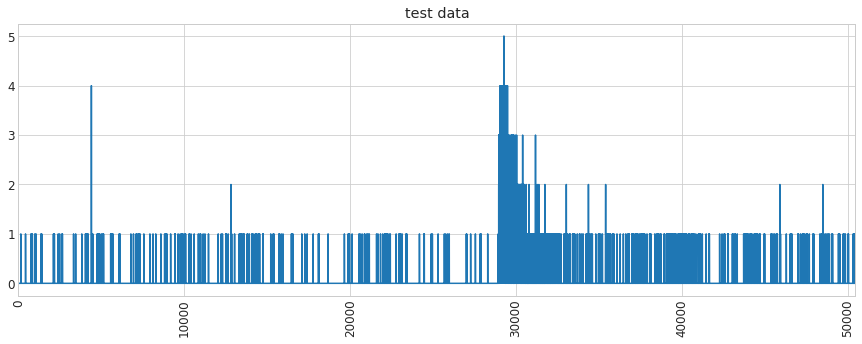

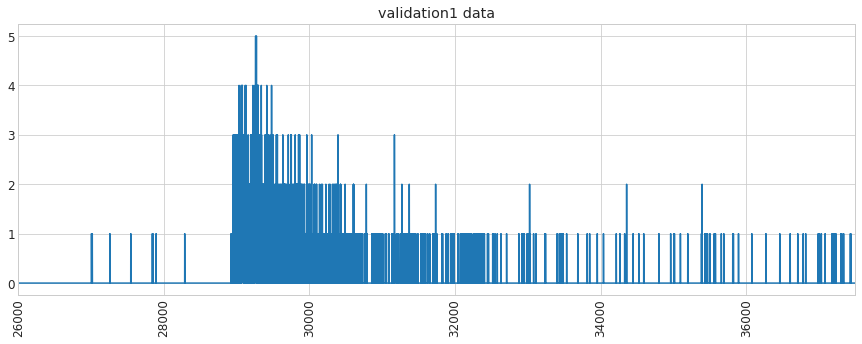

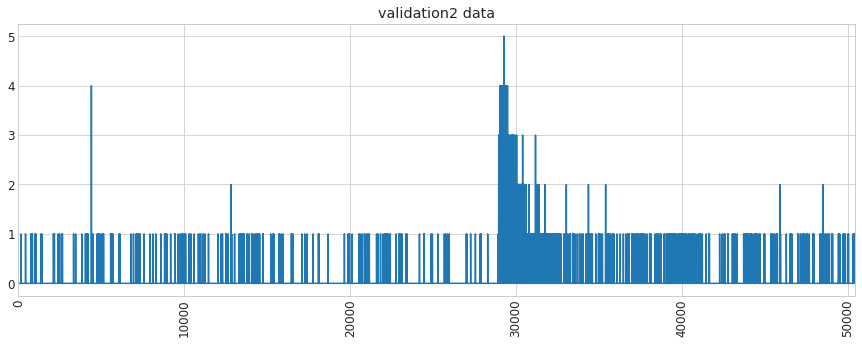

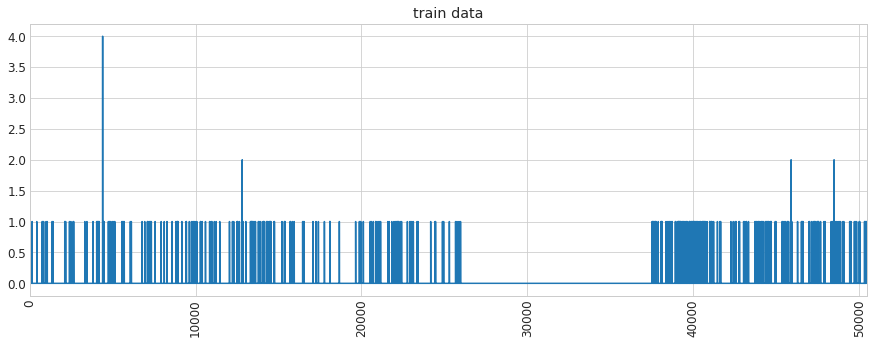

In [55]:
df_anomaly1 = df[26000:37500]
df_test = df

df_validation1= df[26000:37500]

df_not_train = df_anomaly1
df_train = df[~df.isin(df_not_train)].dropna()
df_validation2 = df_test

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

    
for key in df_dict:
    df_tmp = df_dict[key]
    plt.figure()
    df_tmp['col2'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        print row
        plt.plot(row[0], row[1], 'r.', markersize=10.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [56]:
for key in df_dict:
    np.save("../resources/data/discords/Earthquake/%s"%(key),df_dict[key])

In [106]:
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here

In [107]:
data_folder = "../resources/data/discords/Earthquake/"

In [108]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape

(38940, 1)
(38940,)


In [109]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)

(50440, 1)
(50440,)
(50440, 1, 1)
(50440, 1)


In [110]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(50440, 1)
(50440,)
(50440, 1)


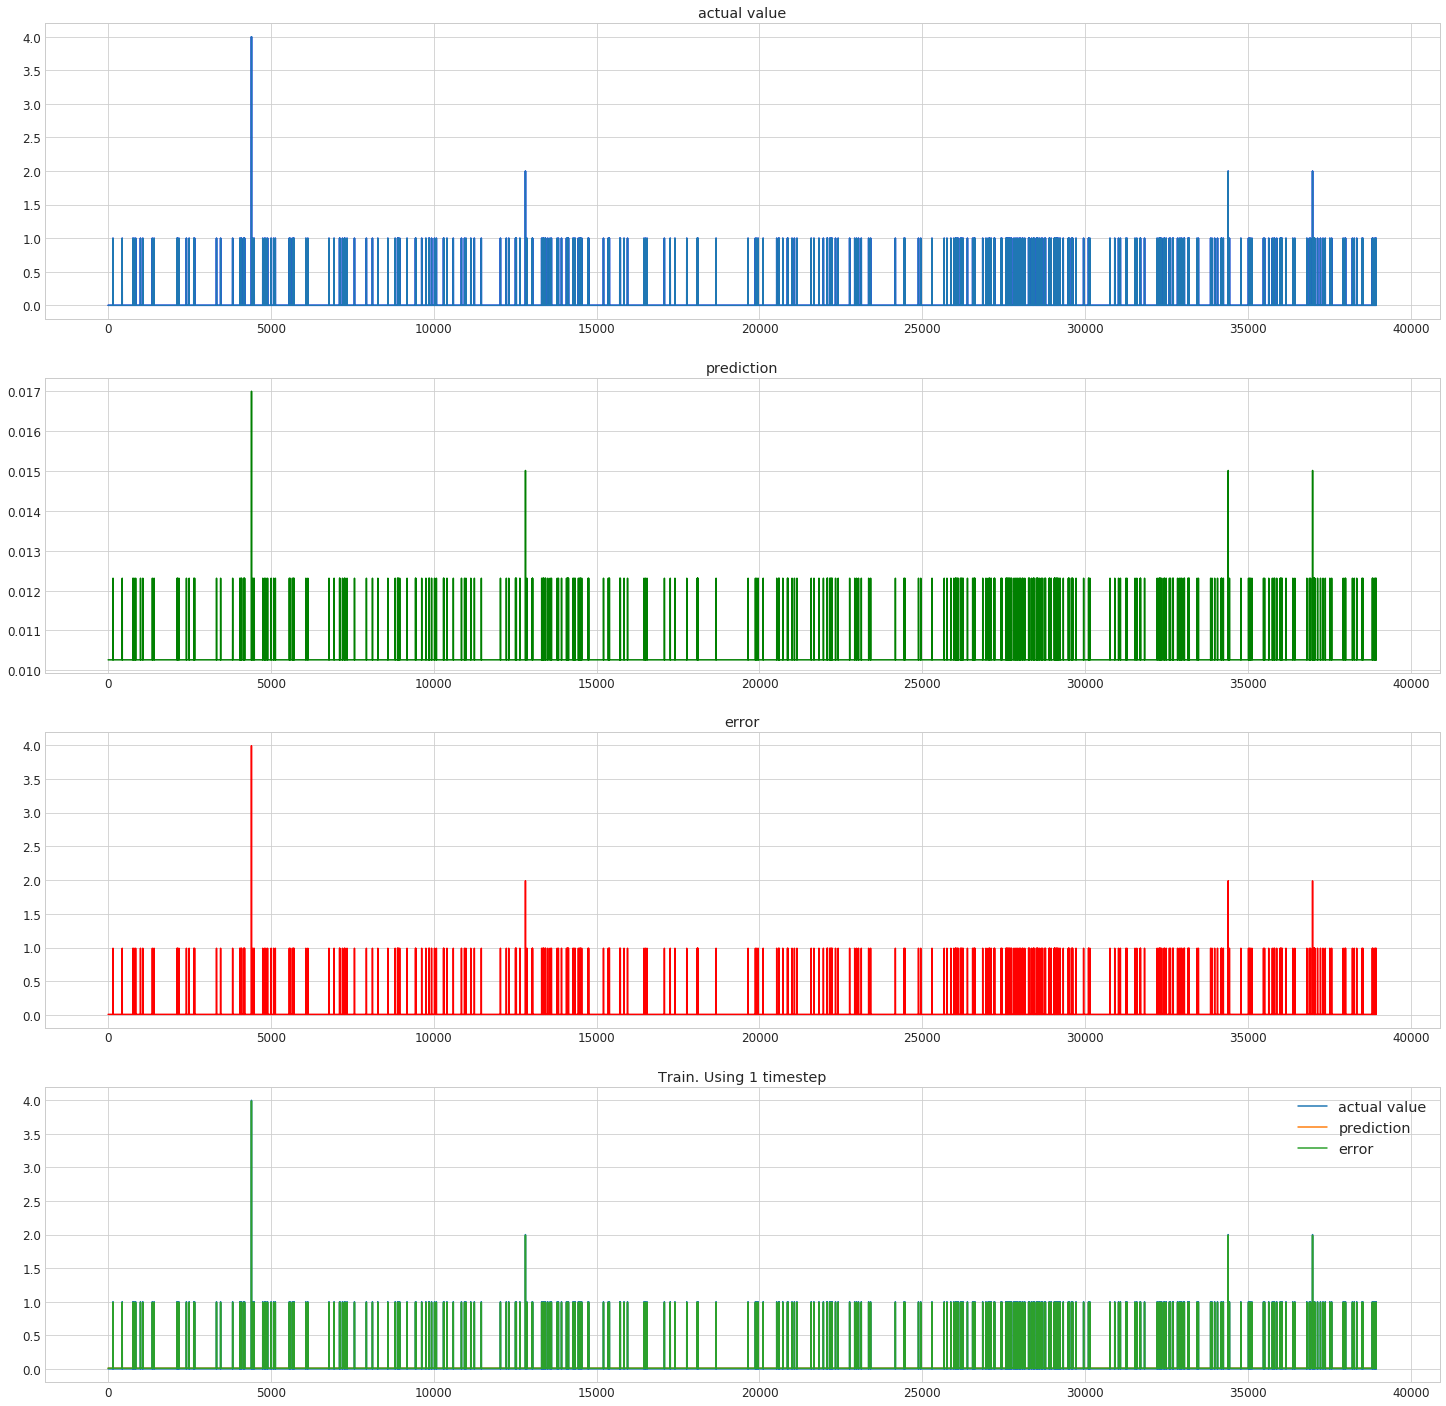

In [111]:
plt.figure(figsize=(25,25))
plt.subplot(411)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(412)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(413)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(414)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.show()

0.019870100744928672
0.10031340967720762


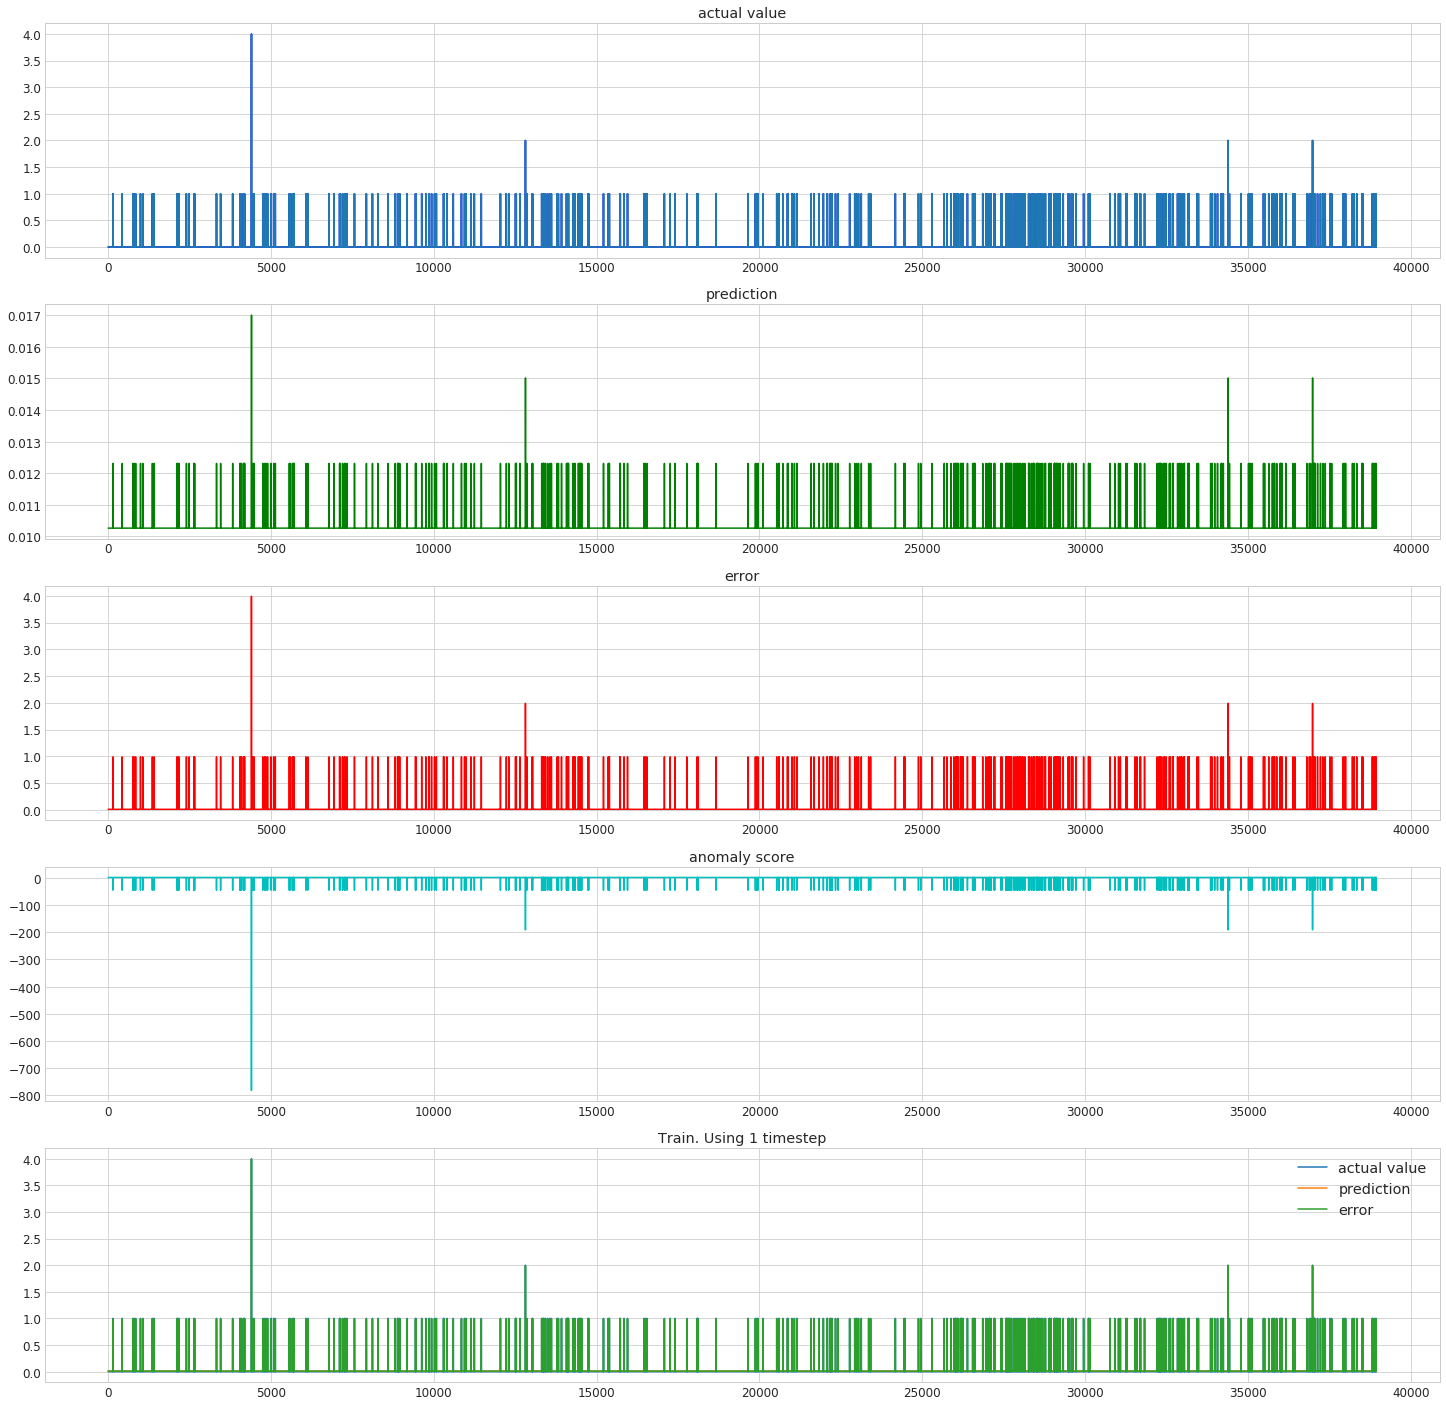

In [112]:
#error vectors
from scipy.stats import norm

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  np.abs(train_true -train_predictions[:,i])

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors)
std = np.std(train_error_vectors)
print mean
print std
p_values= norm(loc=mean, scale=std).logpdf(train_error_vectors)

plt.figure(figsize=(25,25))
plt.subplot(511)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(512)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(513)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(515)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.subplot(514)
plt.plot(p_values,'c-')
plt.title("anomaly score")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

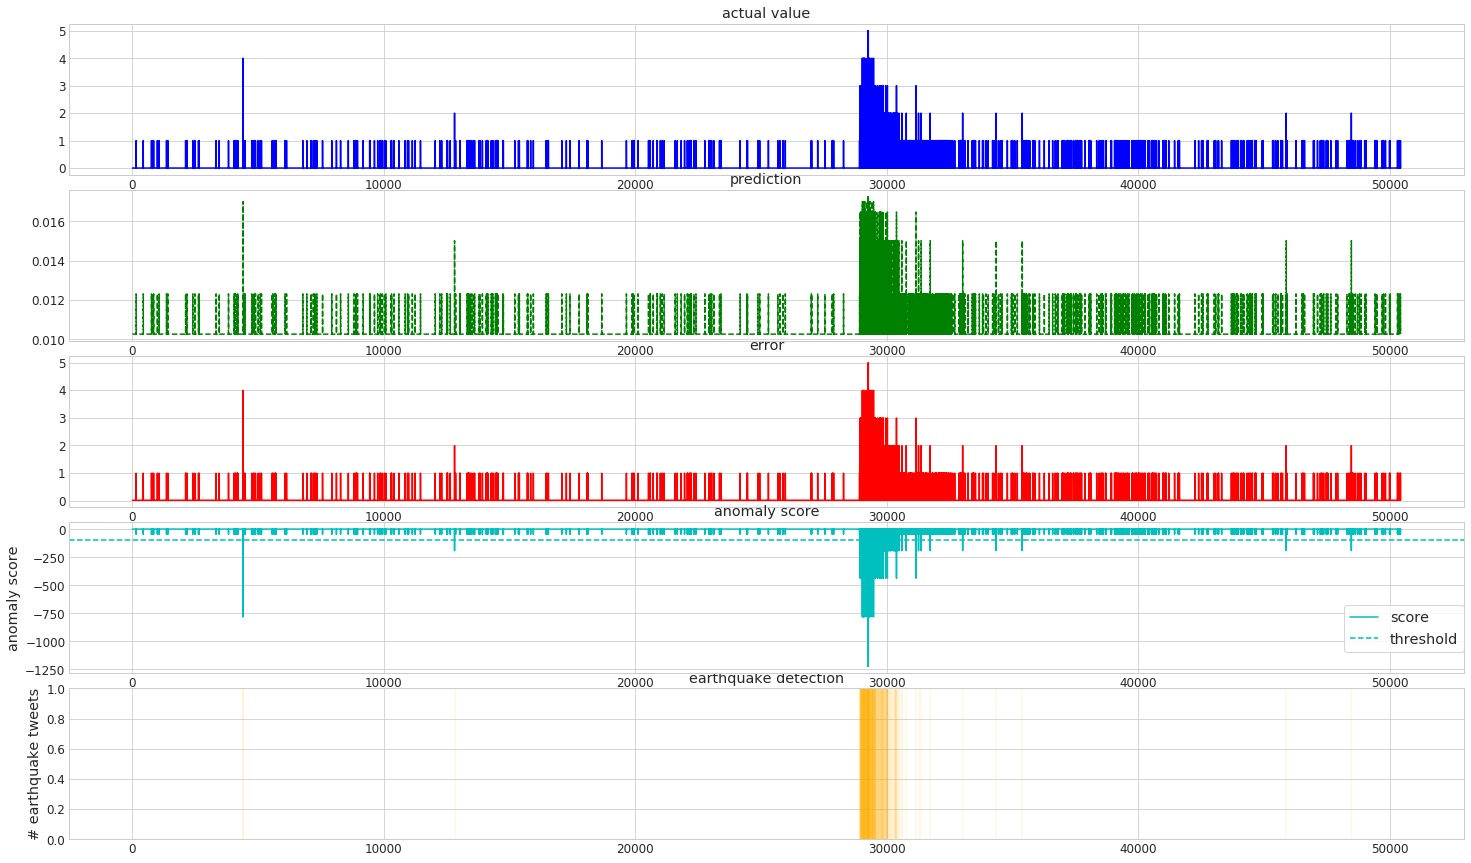

In [120]:
threshold_v2 = -100

f = plt.figure(figsize=(25,15))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)

#print v2_below_threshold

ax1 = plt.subplot(511)
ax1.plot(validation2_true,label='actual value',color='b')
plt.title("actual value")

ax2 = plt.subplot(512,sharex=ax1)
ax2.plot(validation2_predictions[:,0],ls ='dashed',label='prediction',color='g')
plt.title("prediction")

ax3 = plt.subplot(513, sharex=ax1)
ax3.plot(abs(validation2_true - validation2_predictions[:,0]),label='error',color='r')
plt.title("error")

ax5 = plt.subplot(515, sharex=ax1)
for column in v2_below_threshold[0]:
    ax5.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=.1)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)

plt.ylabel("# earthquake tweets")
plt.title("earthquake detection")


#plot v2 log PD
ax4 = plt.subplot(514, sharex=ax1)
ax4.plot(v2_p_values,label='score',color='c')
ax4.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax4.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
plt.title("anomaly score")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
# xticklabels = ax1.get_xticklabels()
# plt.setp(xticklabels, visible=False)
# plt.xlabel("time")
plt.show()
pp = PdfPages('earthquake1 tweets_v2.pdf')
pp.savefig(f)
pp.close()

In [114]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  np.abs(validation2_true -validation2_predictions[:,i])

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_error_vectors)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= norm(loc=mean, scale=std).logpdf(test_error_vectors)
test_true_anomalies = np.where(test_labels[:,0]==1)

[ 4401  4402 12814 28946 28949 28951 28956 28960 28961 28964 28966 28969
 28975 28976 28978 28979 28983 28991 28996 28997 29002 29003 29004 29007
 29008 29013 29023 29025 29028 29032 29034 29037 29044 29049 29052 29056
 29062 29071 29072 29073 29074 29076 29077 29079 29082 29087 29088 29089
 29090 29092 29094 29096 29097 29100 29101 29106 29111 29115 29116 29118
 29121 29123 29125 29127 29128 29132 29137 29146 29147 29150 29155 29156
 29167 29170 29173 29182 29183 29187 29191 29193 29194 29196 29197 29198
 29203 29205 29209 29222 29223 29224 29225 29227 29228 29235 29239 29242
 29248 29250 29251 29252 29253 29255 29256 29257 29258 29259 29260 29262
 29263 29264 29265 29266 29267 29268 29269 29270 29272 29273 29274 29276
 29277 29281 29284 29286 29287 29288 29290 29291 29292 29294 29295 29298
 29300 29307 29311 29312 29318 29320 29329 29333 29337 29340 29343 29349
 29350 29352 29357 29366 29372 29373 29377 29380 29388 29395 29402 29404
 29409 29412 29413 29414 29417 29418 29420 29427 29

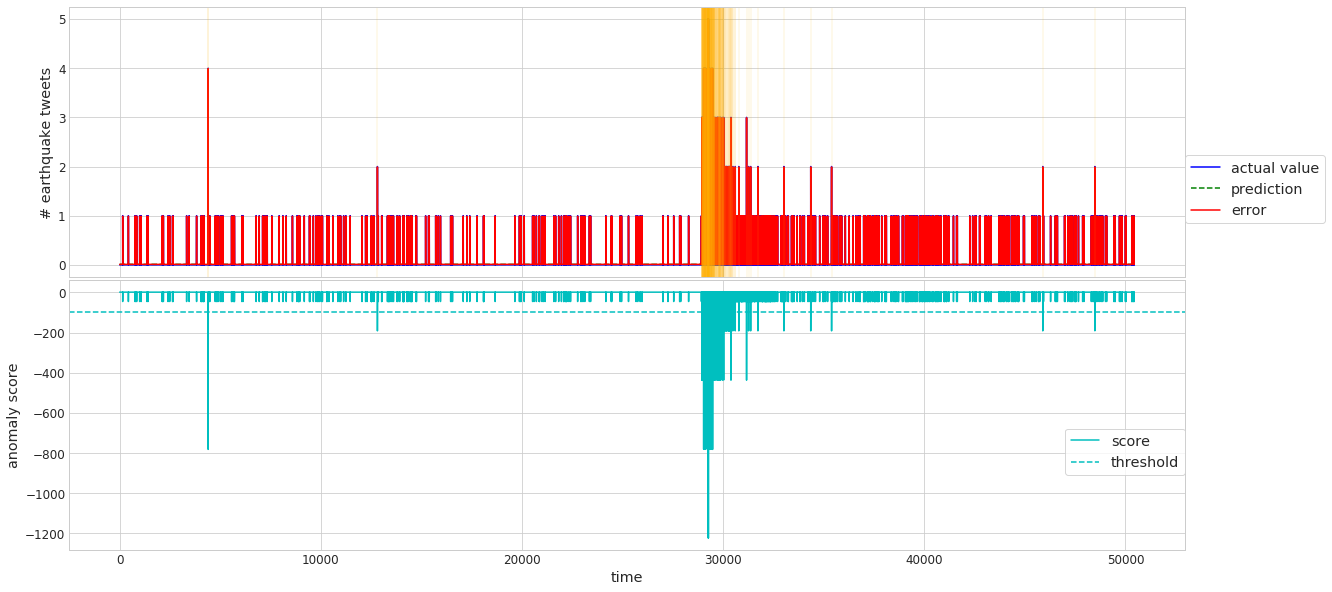

In [115]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
print test_below_threshold[0]
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='actual value',color='b')
ax1.plot(test_predictions[:,0],ls ='dashed',label='prediction',color='g')
ax1.plot(abs(test_true - test_predictions[:,0]),label='error',color='r')
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("# earthquake tweets")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='score',color='c')
ax2.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("time")
plt.show()
pp = PdfPages('Earthquake_test.pdf')
pp.savefig(f)
pp.close()

In [116]:
test_below_threshold[0]

array([ 4401,  4402, 12814, 28946, 28949, 28951, 28956, 28960, 28961,
       28964, 28966, 28969, 28975, 28976, 28978, 28979, 28983, 28991,
       28996, 28997, 29002, 29003, 29004, 29007, 29008, 29013, 29023,
       29025, 29028, 29032, 29034, 29037, 29044, 29049, 29052, 29056,
       29062, 29071, 29072, 29073, 29074, 29076, 29077, 29079, 29082,
       29087, 29088, 29089, 29090, 29092, 29094, 29096, 29097, 29100,
       29101, 29106, 29111, 29115, 29116, 29118, 29121, 29123, 29125,
       29127, 29128, 29132, 29137, 29146, 29147, 29150, 29155, 29156,
       29167, 29170, 29173, 29182, 29183, 29187, 29191, 29193, 29194,
       29196, 29197, 29198, 29203, 29205, 29209, 29222, 29223, 29224,
       29225, 29227, 29228, 29235, 29239, 29242, 29248, 29250, 29251,
       29252, 29253, 29255, 29256, 29257, 29258, 29259, 29260, 29262,
       29263, 29264, 29265, 29266, 29267, 29268, 29269, 29270, 29272,
       29273, 29274, 29276, 29277, 29281, 29284, 29286, 29287, 29288,
       29290, 29291,

In [117]:
test_below_threshold[0][0]

4401

In [118]:
df = pd.read_csv("../resources/data/discords/Earthquake/2.FromJsontoRawstream_earthquake8_ngay21thag9_Accumulate5secondsPredZERO_Ori.csv",header=None,names=['col0','col1','col2'],sep=",")

In [104]:
df['col1'][28946]

'09/19/2016 11:36:39'